<div style="border:solid green 2px; padding: 20px">
<b>Артём, привет!</b>

Меня зовут Евгений Д., и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться с тем о чем сам проект. Можно также привести краткий план проведения самой работы и описание используемых столбцов. 

</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

try: 
    real_estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
    
    real_estate_data.head()

    real_estate_data.info()

    real_estate_data.head(10)

except:
    real_estate_data = pd.read_csv('/home/artyom/datasets/real_estate_data.csv', sep='\t')

    real_estate_data.head()

    real_estate_data.info()

    real_estate_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>

<s>Поправь пожалуйста ошибку в коде, чтобы я смог проверить проект дальше.
    
Рекомендую перед отправкой проекта запустить весь проект целиком, чтобы не возникло дополнительных ошибок.

Лучше всего использовать связку `try – except`, где мы укажем пути на сервере и локальной машине соответственно.  </s>
    
</div>
<div class="alert alert-info"> <b>Комментарий студента:</b> Добрый день, добавил путь на серевере, и сохранил свой локальный путь в except.</div>

### Вывод

Имеем 22 поля с данными. 
Используются типы данных -- целочисленный, с плавающей точкой, и строковый. 

Поля floors_total, balcony, parks_around3000, ponds_around3000  следует перевести в целочисленный тип, так как эти величины имеют смысл в натуральных числах. 

first_day_exposition -- необходимо перевести в формат даты.

airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, ponds_nearest -- следует перевести в целочисленный тип, так как точность до метра будет достаточна.

Пропуски имеются в полях:

ceiling_height -- заполнить значениями не получится.

floors_total -- заполнить значениями не получится.

living_area -- заполним, где возможно, из total_area вычтя kitchen_area

is_apartment -- заполнить значениями не получится

kitchen_area -- заполним, где возможно, из total_area вычтя living_area

balcony -- пустые значения заменим на ноль

locality_name -- заполнить значениями не получится.

airports_nearest  -- заполнить значениями не получится.

cityCenters_nearest  -- заполнить значениями не получится.

parks_around3000 -- заполнить значениями не получится.


parks_nearest  -- заполнить значениями не получится.
days_exposition -- где не заполнено, высчитаем на текущую дату, вычтя из first_day_exposition

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати можно было бы использовать метод `display` `from Ipython.display import display`, чтобы были показаны наши данные в связке `try – except`.
    
</div>

### Шаг 2. Предобработка данных

<b><p> Заполнение пропусков нулями </b></p>

In [2]:
real_estate_data.isna().sum()
#высота потолков -- почему не указана, не известно. но в каждом доме есть потолок, есть среднее значение высоты потолка в домах.
#заменим пустые значения высоты потолка на среднее 

real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].fillna(real_estate_data['ceiling_height'].mean())

real_estate_data.isna().sum()

#floors_total -- для 86 записей отсутсвует информация об этажности дома. Не бывает домов, где 0 этажей. Поэтому, будем пологать этажность дома равной этажу жилья.

real_estate_data['floors_total'] = real_estate_data['floors_total'].fillna(real_estate_data['floor'])

#living_area -- Там, где это возможно, высчитаем размер жилой зоны

real_estate_data['living_area'] = real_estate_data['living_area'].fillna(real_estate_data['total_area'] - real_estate_data['kitchen_area'])

#уменьшили число пропущенных значений жилой зоны; было 1903 пропуска, стало 1464.

#kitchen_area -- там, где возможно, надйем размер кухни

real_estate_data['kitchen_area'] = real_estate_data['kitchen_area'].fillna(real_estate_data['total_area'] - real_estate_data['living_area'])

#уменьшили число пропущенных значений кухонной зоны; было 2278 пропуска, стало 1464

#Оставшиеся пропуски площади жилой зоны примем равными значению total_area. Бывает недвижимость без кухни, например отдельные комнаты.

real_estate_data['living_area'] = real_estate_data['living_area'].fillna(real_estate_data['total_area'])

#Оставшиеся пропуски площади кухонной зоны примем равными значению 0. Будем считать, что в такой недвижмости кухня отсутствует

real_estate_data['kitchen_area'] = real_estate_data['kitchen_area'].fillna(0)

#is_apartment -- более 85 процентов значений не содержат такую характеристику. Не будем заполнять эти пропуски
#будем избегать ссылок на такой недостоверный столбец

#balcony -- там, где информации нет, будем считать, что балкон отсутствует.

real_estate_data['balcony'] = real_estate_data['balcony'].fillna(0)

#locality_name -- записи без указания населенного пункта не будут иметь ценности. Такие строки удалим.

real_estate_data.dropna(subset = ['locality_name'], inplace = True)

real_estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Если код не помещается в одну строку, рекомендую переносить его на следующую подстроку, с помощью обратного слеша. Так код читается быстрее и понятнее.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Я бы рекомендовал не использовать атрибут `inplace`, так как в последующих обновлениях библотеки `pandas` он будет удален.
    
Лучше всего переопределять переменные. 
    
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Лучше всего конечно отображать полученные расчеты с помощью кода, потому что их проще понять, и проследить дальнейшую логику выполнения проекта.
    
Когда мы пишем комментарии, без выполненного кода, то есть когда у нас есть полученный результат выполнения кода, то становится просто сложнее изучать код. 
    
</div>

<p><b> Заполнение части пропусков подобранными значениями; дозаполнение прочих пропусков нулями </b></p>

In [3]:
#Неизвестные расстояния до аэропорта заполним медианным значением для конкретного населенного пункта
#cоздадим переменную, в которой соханим средние значения до аэропорта для каждого населенного пункта

airports_median = real_estate_data.groupby('locality_name')['airports_nearest'].median().to_dict()

#получили объект со средними значениями расстояния до ближайшего аэропорта по каждому населенному пункту
#далее создадим функцию для строк, где содержаться неизвестные расстояния до аэропорта

def airports(row):
    if pd.isna(row['airports_nearest']):
        return airports_median.get(row['locality_name'])
    return row['airports_nearest']

real_estate_data['airports_nearest'] = real_estate_data.apply(airports, axis=1)

real_estate_data.isna().sum()

#Было 5534 неизвестных расстояния до аэропорта, стало 5386. В этих населенных пунктах нет никакого ближайшего аэропорта в зоне досягаемости

#аналогичным образом, найдем неизвестные расстояния до центров ближайших городов

cityCenters_nearest_median = real_estate_data.groupby('locality_name')['cityCenters_nearest'].median().to_dict()

def cityCenters(row):
    if pd.isna(row['cityCenters_nearest']):
        return cityCenters_nearest_median.get(row['locality_name'])
    return row['cityCenters_nearest']

real_estate_data['cityCenters_nearest'] = real_estate_data.apply(cityCenters, axis=1)

real_estate_data.isna().sum() #,было 5511 записей, стало 5386

#parks_around3000 -- ближайшие парки в радиусе 3 км. Не указанные значения будем трактовать как отсутствие парков, иначе наличие было бы отражено в записи.

real_estate_data['parks_around3000'] = real_estate_data['parks_around3000'].fillna(0)

real_estate_data.isna().sum() #,было 5511 записей, стало 5386

#parks_nearest -- заполним пропуски аналогично ближайшему аэропроту, и центру города

parks_nearest_median = real_estate_data.groupby('locality_name')['parks_nearest'].median().to_dict()

def parksNearest(row):
    if pd.isna(row['parks_nearest']):
        return parks_nearest_median.get(row['locality_name'])
    return row['parks_nearest']

real_estate_data['parks_nearest'] = real_estate_data.apply(parksNearest, axis=1)

real_estate_data.isna().sum() #,было 15586 записей, стало 5998

#ponds_around3000 -- ближайшие пруды в радиусе 3 км. Не указанные значения будем трактовать как отсутствие прудов, иначе наличие было бы отражено в записи.

real_estate_data['ponds_around3000'] = real_estate_data['ponds_around3000'].fillna(0)

real_estate_data.isna().sum() 

#ponds_nearest -- заполним пропуски аналогично ближайшему аэропроту, центру города, и паркам

ponds_nearest_median = real_estate_data.groupby('locality_name')['ponds_nearest'].median().to_dict()

def pondsNearest(row):
    if pd.isna(row['ponds_nearest']):
        return ponds_nearest_median.get(row['locality_name'])
    return row['ponds_nearest']

real_estate_data['ponds_nearest'] = real_estate_data.apply(pondsNearest, axis=1)

real_estate_data.isna().sum() #было 14565 пропусков стало 5494


#days_exposition -- будем считать, что если значение не известно, то недвижимость была продана менее чем за сутки, т.е. 0 дней

real_estate_data['days_exposition'] = real_estate_data['days_exposition'].fillna(0)

real_estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5386
cityCenters_nearest      5386
parks_around3000            0
parks_nearest            5998
ponds_around3000            0
ponds_nearest            5494
days_exposition             0
dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хороший способ заполнения данных точечным методом, то есть по группам заполняем пропуски.
    
Тем самым точечно повышаем нашу дисперсию.
    
---
    
Здорово, что пишем свои собственные функции, хорошим тоном считается писать для них также докстринги. 
    
    
</div>

<p><b> Приведение к оптимальным типам данных </b></p>

In [4]:
#################################################################
################ приведем данные к нужным типам #################
#################################################################

#first_day_exposition -- из строки к дате

real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#ceiling_height -- округлим до двух сотых

real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].round(decimals=2)

#floors_total -- число этажей не может быть не целым, переводим в интеджер

real_estate_data['floors_total'] = real_estate_data['floors_total'].astype('int')

#balcony -- число балконов не может быть не целым числом, переводим в интеджер

real_estate_data['balcony'] = real_estate_data['balcony'].astype('int')

#parks_around3000 -- число парков не может быть не целым числом, переводим в интеджер

real_estate_data['parks_around3000'] = real_estate_data['parks_around3000'].astype('int')

#ponds_around3000 -- число прудов не может быть не целым числом, переводим в интеджер

real_estate_data['ponds_around3000'] = real_estate_data['ponds_around3000'].astype('int')

<p><b>Из хакарктеристик недвижимости, проверим параметр высоты потолков, где легче всего заметить и исправить неправильно указанную размерность</b></p>

In [5]:
#проверим, что везде указана верная высота потолков, нет аномалий

# real_estate_data.query('ceiling_height > 20') # есть потолки выше 20 метров. Вероятно при указании высоты, указали в сантиметрах.

#приведем к метрам

real_estate_data.loc[real_estate_data['ceiling_height'] > 10, 'ceiling_height'] = real_estate_data.loc[real_estate_data['ceiling_height'] > 10, 'ceiling_height'] / 10

real_estate_data.query('ceiling_height > 20') #теперь  анамально высоких помещений нет

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Выводы п.2

<p>Избавился от пропусков -- где допустимо логически, заполнил пропуски нулями. 
Там где часть значений возможно спрогнозировать, выполнил расчеты на основании группировок и поиска медианных значений по группам. Выполнил приведение к оптимальным типам</p>

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>

<s>Давай разделим все наши длительные ячейки на последовательные действия.
    
Почему предлагаю это сделать ? 
    
1. Чтобы код было более удобным и читабельным.
2. А также мои комментарии будет гораздо удобнее изучать.
    
Обыно длительный код используется в разработке в какой–нибудь среде `pycharm` и прочих интерпритаторов. 
    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
Добрый вечер. 
    
Разбил тетрадку на дополнительные блоки. 
    
Вы не сообщили о необходимости разбить файл на блоки во время первого ревью, или что он внешне не соответствует какому-то из нужных гайдлайнов.
    
По умолчанию я придерживался оформления, заданного тетрадкой проекта, и теперь не знаю что ожидать дальше -- будут ли еще какие-то замечания, о которых о которых я не могу догадаться.
    
К сожалению, время выполнять работу у меня есть только в вечерние часы, и еще меньше времени есть на изучение теории в тренажере. Поэтому я был бы благодарен узнавать о всех критических замечаниях в оформлении, которые лежат на поверхности, сразу -- это очень бы помогло. Спасибо.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: (2)</b>

Вот некоторые правила по оформлению проекта.
    
https://www.notion.so/35d9c2f32ffa42f3b17010737aedca4b
    
Тут много примеров по заполнению.
    
https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#social-data
    
Вот один из них
    
https://nbviewer.jupyter.org/gist/fonnesbeck/8495259
    
</div>



### Шаг 3. Посчитайте и добавьте в таблицу

In [6]:
#посчитаем цену одного квадратного метра

real_estate_data['price_per_meter'] = real_estate_data['last_price'] / real_estate_data['total_area']

real_estate_data.head()

#округлим price_per_meter 

real_estate_data['price_per_meter'] = real_estate_data['price_per_meter'].round(decimals=1)

#в отдельное поле выделим год побликации объявлений

real_estate_data['first_day_exposition_YEAR'] = real_estate_data['first_day_exposition'].dt.year

#в отдельное поле выделим месяц публикации объявлений

real_estate_data['first_day_exposition_MONTH'] = real_estate_data['first_day_exposition'].dt.month

#в отдельное поле выделим день публикации объявлений

real_estate_data['first_day_exposition_DAY'] = real_estate_data['first_day_exposition'].dt.day

#выделим группы этажности -- первый, последний, и другой

def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый этаж'
    elif row['floor'] == row['floors_total']:
        return 'последний этаж'
    else:
        return 'другой этаж'
    

real_estate_data['floor_category'] = real_estate_data.apply(categorize_floor, axis = 1)

#выделим соотношение жилой площади к общей

real_estate_data['living_to_total_area'] = real_estate_data['living_area'] / real_estate_data['total_area']

real_estate_data['living_to_total_area'] = real_estate_data['living_to_total_area'].round(decimals=2)

#выделим соотношение площади кухни к общей площади 

real_estate_data['kitchen_to_total_area'] = real_estate_data['kitchen_area'] / real_estate_data['total_area']

real_estate_data['kitchen_to_total_area'] = real_estate_data['kitchen_to_total_area'].round(decimals=2)

real_estate_data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,first_day_exposition_YEAR,first_day_exposition_MONTH,first_day_exposition_DAY,floor_category,living_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2,755.0,0.0,120370.4,2019,3,7,другой этаж,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.77,11,18.6,1,NaN,...,0,584.5,81.0,82920.8,2018,12,4,первый этаж,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.77,5,34.3,4,NaN,...,2,574.0,558.0,92785.7,2015,8,20,другой этаж,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.77,14,159.0,9,NaN,...,3,234.0,424.0,408176.1,2015,7,24,другой этаж,1.00,0.00
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1,48.0,121.0,100000.0,2018,6,19,другой этаж,0.32,0.41


#### Выводы п.3.

<p>
В датафрейм добавил:
    
    цену одного квадратного метра,
    
    год побликации объявлений,
    
    месяц побликации объявлений,
    
    день побликации объявлений,
    
    выделенные группы этажности,
    
    соотношение жилой площади к общей,
    
    соотношение площади кухни к общей площади
</p>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Мы достаточно детально обработали наши данные и добавили все необходимые значения в нашу выборку. Давай теперь проведём анализ.
    
</div>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

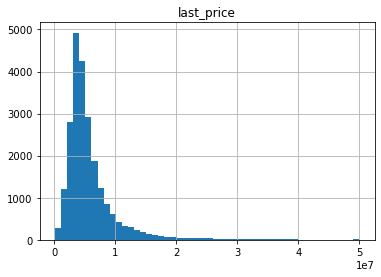

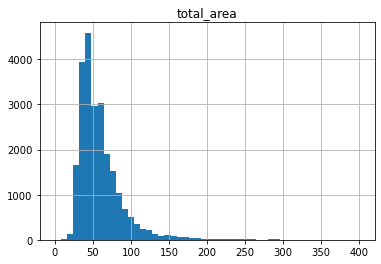

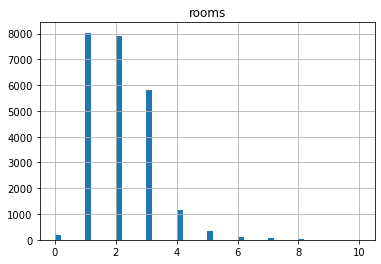

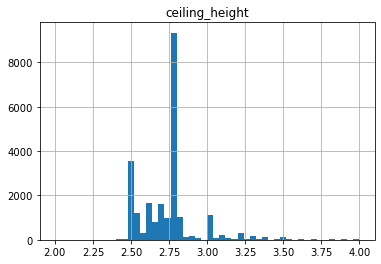

In [7]:
#Изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
#Постройте гистограммы для каждого параметра.

real_estate_data.hist('last_price', bins=50, range=(100000, 50000000))
plt.show() 
#чаще всего стоимость квартир колеблется в райне 4 млн

real_estate_data.hist('total_area', bins = 50, range=(0, 400))  
plt.show() 
#площадь квартир на продаже чаще всего в районе до 50 м кв

real_estate_data.hist('rooms', bins = 50, range=(0, 10))
plt.show() 
#в основном продают 1 и 2 комнатные квартиры, почти с одинаковой частотой. 3х комнатные примерно на 20 процентов реже

real_estate_data.hist('ceiling_height', bins = 50, range=(2, 4))
plt.show() 
#Чаще всего высотка полков в жилье находится в районе 2.75 метра. Жилья с высотой потолков более 4 метров убывающе мало.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Чтобы нам в ручную не задавать параметр `range` мы можем посмотреть в открытом доступе  – как считать интерквартильный размах для нижнего и верхнего уровня нормального распределения.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия повторяются с точки зрения построения графиков.
    
Это говорит о том, что мы можем создать функцию, которая будет выполнять все действия за нас.
    
Тем самым мы сможем оптимизировать свой код и проект целиком.
    
</div>

#### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

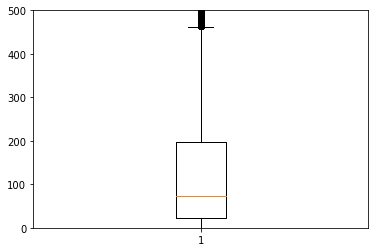

Среднее время продажи жилья составляет: 156.4 суток
Медианное время продажи жилья составляет: 73.0 суток


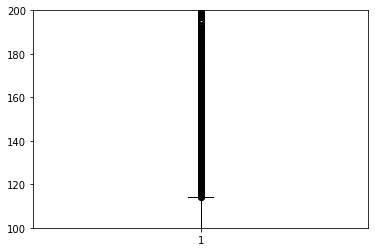

Средняя площадь жилья составляет: 60.3 м.кв
Медианная площадь жилья составляет: 52.0 м.кв
       total_images    last_price    total_area         rooms  ceiling_height  \
count  23650.000000  2.365000e+04  23650.000000  23650.000000    23650.000000   
mean       9.862326  6.541127e+06     60.329069      2.070106        2.744173   
std        5.682278  1.089640e+07     35.661808      1.078620        0.235454   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.600000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.770000   
75%       14.000000  6.799000e+06     69.700000      3.000000        2.770000   
max       50.000000  7.630000e+08    900.000000     19.000000       10.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23650.000000  23650.000000  23650.000000  23650.000000  23650.000000   
mean      10.673784   

In [8]:
plt.boxplot(real_estate_data['days_exposition'])
plt.ylim(0, 500)
plt.show()

#Видно, что есть много выбросов после примерно 450 суток. Медианное время продажи жилья находится в районе 70 дней.
#Верхняя граница первого квантиля находися в районе 20 суток. Все, что лежит ниже этого значения будем считать 
#особенно быстрыми продажами.
#Проверим данные с диаграммы размаха.

print('Среднее время продажи жилья составляет: {:.1f} суток'.format(real_estate_data['days_exposition'].mean()))
print('Медианное время продажи жилья составляет: {} суток'.format(real_estate_data['days_exposition'].median()))

plt.boxplot(real_estate_data['total_area'])
plt.ylim(100, 200)
plt.show()

print('Средняя площадь жилья составляет: {:.1f} м.кв'.format(real_estate_data['total_area'].mean()))
print('Медианная площадь жилья составляет: {} м.кв'.format(real_estate_data['total_area'].median()))

#на диаграмме размаха по плозади видно, что много выбросов начинается после значения 120 м кв.

#Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили

print(real_estate_data.describe())

#не бывает жилья, где 0 комнат

real_estate_filtered = real_estate_data.query('rooms >= 1') #23453

#маловероятно, что существует жилье где больше 10 комнат

real_estate_filtered = real_estate_filtered.query('rooms <= 10')

#маловероятно, что существует жилье где больше 4 балконов

real_estate_filtered = real_estate_filtered.query('balcony <= 4')

#маловероятно, что существует жилье где до аэропорта ближе чем 1 км. Жилые дома не строят так близко к аэропортам.

real_estate_filtered['airports_nearest'] = real_estate_data['airports_nearest'].round(decimals=1)

real_estate_filtered = real_estate_filtered.query('airports_nearest >= 1000.0 | airports_nearest.isna()', engine='python')

#скорее всего, не будет репрезентативной выборка по квартирамс площадью более 120 м кв.

real_estate_filtered = real_estate_filtered.query('total_area <= 120')


real_estate_filtered.info()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Рекомендую не применять метод `print()` для вывода таблиц. Лучше импортировать в
начале проекта метод `display` из библиотеки `IPython.display` и
применять его:

---
    
`from IPython.display import display`

`display(df)`

    
</div>

#### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. 

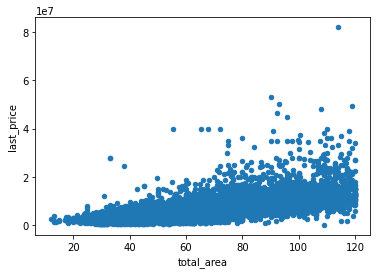

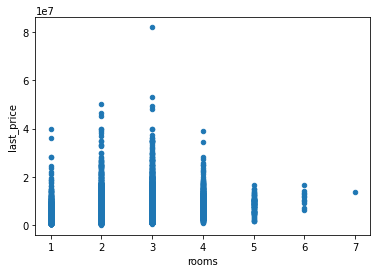

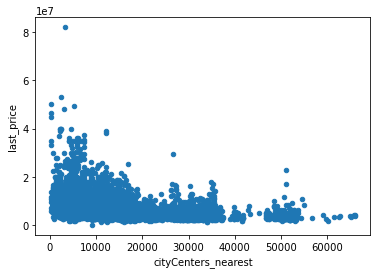

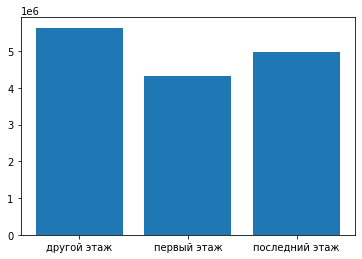

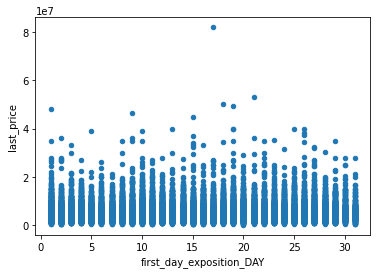

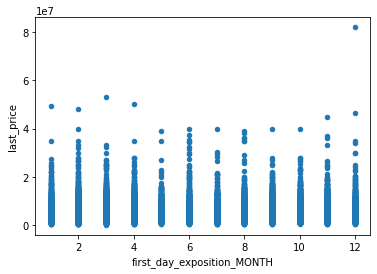

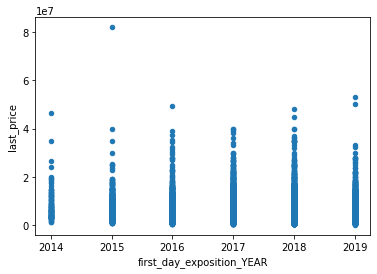

In [9]:
price_factors = ['total_area', 'rooms','cityCenters_nearest']
 
for factor in price_factors:
    real_estate_filtered.plot(x=factor, y='last_price', kind='scatter')
    plt.show()
    
#Видно, что с ростом значения площади, растет значение цены продажи. Устойчивый тренд наблюдается примерно до значения
#площади 100 м.кв, после чего начинаются выбросы. Вероятно, элитная недвжимость с большой площадью формирует разброс хвоста графика.


# Цена жилья устойчиво растет с колиеством комнат. Однако после числа комнат более 3 рост прекращается. Вероятно,
# что большое число комнат может быть в коммунальных квартирах -- их много в СПб. 
# Качество жилплощади в коммуналках часто не самое лучшее, поэтому проседает рост цены.

# Очевидные максимумы стоитомсти жилья наблюдаются ближе всего к центру ближайшего города.

#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

price_to_floor = real_estate_filtered.groupby('floor_category')['last_price'].mean()
plt.bar(price_to_floor.index, price_to_floor.values)
plt.show()

#средние цены на жилье на первом этаже самые низкие. Самые большие средние цены на жильё на последних этажах.


#Также изучите зависимость от даты размещения: дня недели, месяца и года.

price_factors_DMY = ['first_day_exposition_DAY', 'first_day_exposition_MONTH','first_day_exposition_YEAR']
 
for factor in price_factors_DMY:
    real_estate_filtered.plot(x=factor, y='last_price', kind='scatter')
    plt.show()

#Стоимость продажи в целом не зависит от дня месяца или месяца; с 2014 наблюдался рост цен на жилье, однако в 2019 произошел спад.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, что получилось применить автоматизацию построения графиков 👍
    
Теперь в нужный момент мы сможем применить данный инструмент.
    
</div>

#### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [10]:
top_cities = real_estate_filtered['locality_name'].value_counts().head(10).index

print(top_cities)

mean_price_per_meter_local = (
    real_estate_filtered
    .query('locality_name in @top_cities')
    .pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean')
    .sort_values(by='price_per_meter', ascending=False)
    .round(decimals=2)
    )

print(mean_price_per_meter_local) #самая большая стоимость за 1 кв метер в Санкт-Петербурге и в Пушкине, самая низка -- в Выборге.

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')
                   price_per_meter
locality_name                     
Санкт-Петербург          110816.79
Пушкин                   102323.37
деревня Кудрово           92585.86
посёлок Парголово         90448.43
посёлок Мурино            85005.74
посёлок Шушары            78546.32
Колпино                   75272.34
Гатчина                   68881.19
Всеволожск                68633.05
Выборг                    58229.73


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Топ городов получен верно. 
    
</div>

<p><b>Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
Выделите квартиры в Санкт-Петербурге ('locality_name'). 
    
Ваша задача — выяснить, какая область входит в центр. 
Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
После этого посчитайте среднюю цену для каждого километра. 
Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
Определите границу, где график сильно меняется — это и будет центральная зона.</b></p>

              price_per_meter
km_to_center                 
0                   161311.95
1                   144920.34
2                   135902.17
3                   123031.09
4                   135403.19
5                   135118.95
6                   132457.04
7                   129774.81
8                   117366.57
9                   109340.60
10                  110945.67
11                  106343.52
12                  109094.64
13                  106514.03
14                  104286.09
15                  101717.08
16                   99652.46
17                   93884.88
18                   94740.39
19                   95452.57
20                  105872.17
21                   91213.30
22                   87751.79
23                   92293.82
24                   82440.34
25                   91136.02
26                   75171.90
27                  132115.70
28                   81840.65
29                   62482.40


<ipython-input-11-9a179fdcc3d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate_SPB['km_to_center'] = real_estate_SPB['cityCenters_nearest'] / 1000
<ipython-input-11-9a179fdcc3d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate_SPB['km_to_center'] = real_estate_SPB['km_to_center'].astype('int')
<ipython-input-11-9a179fdcc3d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

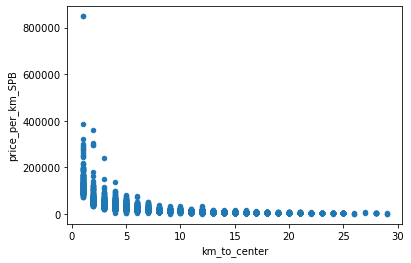

In [11]:
real_estate_SPB = real_estate_filtered.query('locality_name == "Санкт-Петербург"')

real_estate_SPB['km_to_center'] = real_estate_SPB['cityCenters_nearest'] / 1000

real_estate_SPB['km_to_center'] = real_estate_SPB['km_to_center'].astype('int')

real_estate_SPB['price_per_km_SPB'] = real_estate_SPB['price_per_meter'] / real_estate_SPB['km_to_center']

pivot_SPB = real_estate_SPB.pivot_table(index='km_to_center', values='price_per_meter', aggfunc='mean').round(decimals = 2)

print(pivot_SPB)

real_estate_SPB.plot(x='km_to_center', y='price_per_km_SPB', kind='scatter')
plt.show()
#Скчаки на стоимость квадратного метра начинаются примерно за 7 км до центра города.

<p><b>
Выделите сегмент квартир в центре. 
Проанализируйте эту территорию и изучите следующие параметры: 
площадь, цена, число комнат, высота потолков. 

Также выделите факторы, которые влияют на стоимость квартиры 
(число комнат, этаж, удалённость от центра, дата размещения объявления). 

Сделайте выводы. Отличаются ли они от общих выводов по всему городу?<b><p>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Ориентировочно да, потому что дальше идёт в том числе спад и длительная стагнация стоимости.
    
</div>

count    2956.000000
mean       70.577053
std        23.493029
min        12.000000
25%        51.000000
50%        69.500000
75%        88.600000
max       120.000000
Name: total_area, dtype: float64
count    2.956000e+03
mean     9.421609e+06
std      5.600080e+06
min      1.600000e+06
25%      6.200000e+06
50%      8.000000e+06
75%      1.090000e+07
max      8.200000e+07
Name: last_price, dtype: float64
count    2956.000000
mean        2.400203
std         0.970209
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64
count    2956.000000
mean        2.932558
std         0.300305
min         2.000000
25%         2.770000
50%         2.770000
75%         3.050000
max         5.300000
Name: ceiling_height, dtype: float64


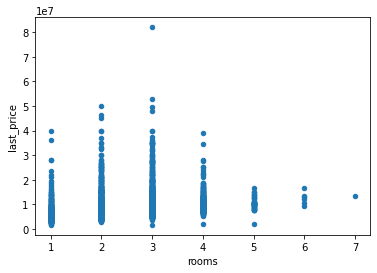

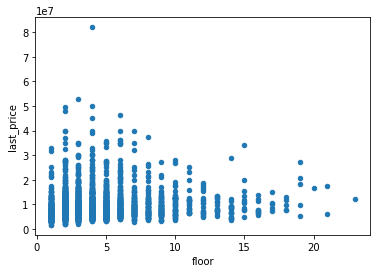

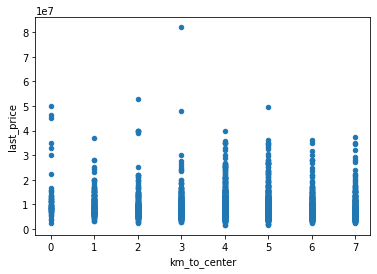

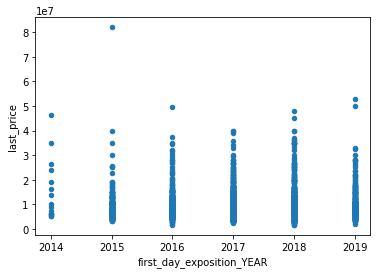

In [12]:
real_estate_SPB_centre = real_estate_SPB.query('km_to_center <= 7')

print(real_estate_SPB_centre['total_area'].describe())
print(real_estate_SPB_centre['last_price'].describe())
print(real_estate_SPB_centre['rooms'].describe())
print(real_estate_SPB_centre['ceiling_height'].describe())

#В центре СПб квартиры средней площади 77м кв, средней стоимостью 9 миллионов руб, медианная стоимость 14,5 млн руб.,
#в среднем, трехкомнатные с высотой потолков в районе 3 метров.

price_factors_SPB_centre = ['rooms','floor', 'km_to_center', 'first_day_exposition_YEAR']
 
for factor in price_factors_SPB_centre:
    real_estate_SPB_centre.plot(x=factor, y='last_price', kind='scatter')
    plt.show()
    
#Квартиры с числом комнат от 3 до 5 наиболее дорогие в центре,
#помещения на первом этаже востребованы примерно также, как и помещения на втором этаже. Стоимость жилья на 6 этаже
#ниже чем на 5 и на 7 -- вероятно, если это последний этаж, то в доме нет лифта. Все что выше -- вероятно имеет лифт.

#внутри центра цена жилья не так сильно зависит от расстояния до условной Дворцовой площади.

#наиболее выгодно было приобретать жилье в центре СПБ в 2014 году.

count    11473.000000
mean        53.698660
std         18.916277
min         13.000000
25%         39.400000
50%         49.000000
75%         64.000000
max        120.000000
Name: total_area, dtype: float64
count    1.147300e+04
mean     5.642630e+06
std      2.662341e+06
min      1.219000e+04
25%      3.970000e+06
50%      4.900000e+06
75%      6.450000e+06
max      3.900000e+07
Name: last_price, dtype: float64
count    11473.000000
mean         1.932450
std          0.875667
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64
count    11473.000000
mean         2.698255
std          0.166824
min          1.000000
25%          2.570000
50%          2.750000
75%          2.770000
max          8.300000
Name: ceiling_height, dtype: float64


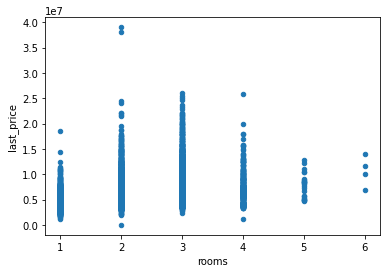

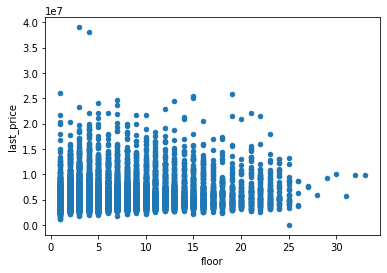

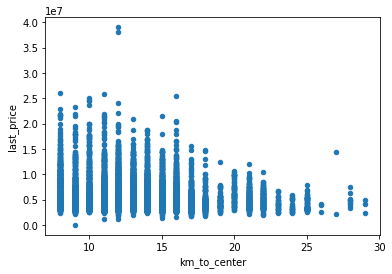

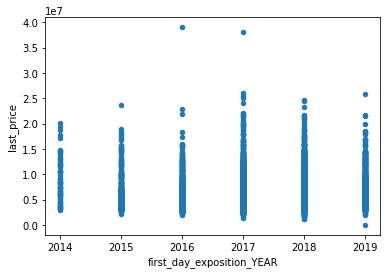

In [13]:
#проведем аналогичный анализ для окраин СПБ


real_estate_SPB_outskirts = real_estate_SPB.query('km_to_center > 7')

print(real_estate_SPB_outskirts['total_area'].describe())
print(real_estate_SPB_outskirts['last_price'].describe())
print(real_estate_SPB_outskirts['rooms'].describe())
print(real_estate_SPB_outskirts['ceiling_height'].describe())


#На окраинах СПБ средняя площадь квартир составляет 56 м. кв, что меньше чем в центре.
#Средняя стоимость жилья составляет порядка 6 млн руб. за 2 комнатную квартиру, со средней высотой потолков 2.75

price_factors_SPB_outskirts = ['rooms','floor', 'km_to_center', 'first_day_exposition_YEAR']
 
for factor in price_factors_SPB_outskirts:
    real_estate_SPB_outskirts.plot(x=factor, y='last_price', kind='scatter')
    plt.show()
    
#на окраинах наиболее цены на квартиры растут с числом комнат, с количеством комнат от 6 и более, предложение падает.

#на окраинах стоимость жилья падает с этажностью, наиболее популярны этажи до 10

#закономерно, чем дальше от центра, тем дешеле жильё

#на окраинах значение года публикации объявления меньше выражено, но заметно, что выгоднее всего было приобретать жилье в 2014 году.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати можно было бы сравнить центр и весь город в целом, для наглядности наших расчетов.
    
</div>

#### Вывод п.4

### Шаг 5. Общий вывод

В работе был изучен архив объявлений в сервисе Яндекс.Недвижимость за предыдущие 5 лет.

На этапе предобработки данных были изучены пропуски в данных, где допустимо -- были воссозданы пропущенные значения. Все поля были приведены к наиболее удобным типам данных.

На этпае рассчета и добавления в датафрейм дополнительных значений, были получены значения цены одного квадратного метра для каждого жилья, выделены категории этажности, выделены составные компоненты даты публикации объявлений о продаже, соотношения жилой и кухонной площадей к общей площади недвижимости.

Осноная часть исследования приведены разделе 4. С помощью сводных таблиц, гисторграмм, диаграмм размаха, и срезов данных удалось установить следующие характерные особенности.

(Также, для корректности анализа, из датафрейма был отброшен ряд логически маловероятных значений.)

На стоимость квартир в наибольшей степени влияют площадь, и близость к центру. 
Количество комнат более 5 чаще всего не повышает стоимости жилья, так как с большой дольей вероятности это коммунальные квартиры

Стоимость сделки продажи не зависит от дня месяца, или месяца совершения сделки; с 2014 наблюдался рост цен на жилье, однако в 2019 произошел спад.

Самая большая стоимость за 1 кв метер в Санкт-Петербурге и в Пушкине, самая низкая -- в Выборге.

На основе динамики цен на квадратный метр жилья, удалось установить что границы зоны центра города в СПб ограничены радиусом 7.5км

В центре города средняя стоисоть жилья составит 9 миллионов рублей за квартиру средней площади (77 м. кв) с высотой потолков в районе 3 метров, с количеством комнат от 3 до 5.
В центре города этаж не существенно влияет на стоимость жилья в зданиях до 6 этажей. Помещения на первом этаже пользуются спросом из-за вероятной возможности переоборудования под коммерческую недвижимость.
Жилье на 6 этаже в центре города проседает в стоимости, вероятно это связано с наличием или отсутствием лифтов в таких домах.

На окраинах СПБ средняя площадь квартир составляет 56 м. кв, что меньше чем в центре города.
Средняя стоимость жилья вне центра СПб составляет порядка 6 млн руб. за 2 комнатную квартиру, со средней высотой потолков 2.75. Наиболее популярны этажи до 10, вероятно люди стараются избегать высоких этажей из-за необходимости пользования лестницами/ожиданием лифтов/возможных проблем с водоснабжением.

С удалением от зоны центра города, стоимость жилья плавно снижается.

Как в центре города, так и на окраинах СПб, наиболее выгодно было покупать жильё в 2014 году.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
Не стоит забывать про оформление своей работы, это важный такой же важный этап. Рекомендую «не стесняться» использовать ячейки типа **markdown** там где нам необходимо отобразить свои размышления, в том числе с использованием дополнительной стилизации.
    
Успехов тебе в новых проектах! 
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Рекомендую посмотреть на дополнительную стилизацию ячеек типа **markdown**.
    
**Жирный**
*Курсив*
    
--- 

# Заголовок первого уровня

--- 
    
## Заголовок второго уровня
  
---  
Списки:
    
- один 
- два
- три
   
---
    
1. Раз
2. Раз раз
3. Раз два три
    
--- 
    
Отображение `переменных`
    
    
    
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод